In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import random
import operator
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# np.set_printoptions(threshold=np.inf)

In [2]:
data_points =[[1,2],
             [1.5,1.8],
             [5,8],
             [8,8],
             [1,0.6],
             [9,11],
             [2,3],
             [6,10]]

In [3]:
x = [col[0] for col in data_points]
y = [col[1] for col in data_points]

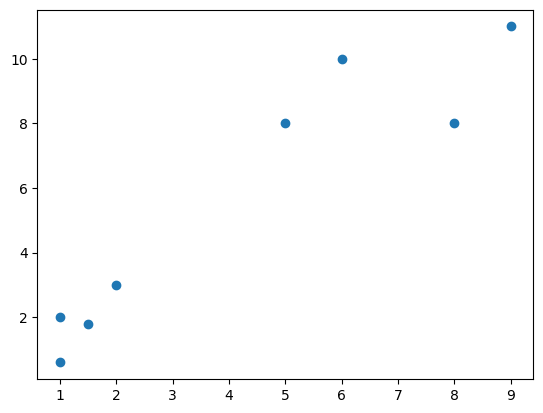

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
clf = KMeans(n_clusters = 2, n_init='auto')
clf.fit(data_points)

KMeans(n_clusters=2, n_init='auto')

In [6]:
centroids = clf.cluster_centers_
labels = clf.labels_

colours = ['g','r','b','y','c','k']
print (labels)

[0 0 1 1 0 1 0 1]


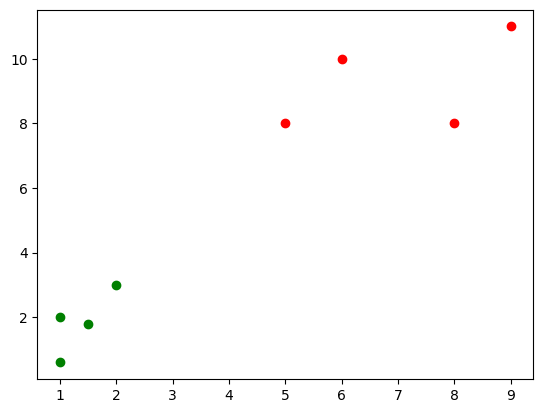

In [7]:
for i in range(len(data_points)):
    plt.scatter(x[i],y[i], c = colours[labels[i]])

TITANIC DATASET

In [8]:
df = pd.read_excel('titanic.xls')
df.drop(['body','name','ticket'], axis=1, inplace = True)
df['fare'].fillna(0, inplace=True)
df['fare'] = df['fare'].astype(int)
df['age'].fillna(np.mean(df['age']), inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,211,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,151,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,151,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,151,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,151,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
# df['cabin_numb_avg'] = [np.mean([int(i) for i in df.cabin_numb[j]]) 
#                         if df.cabin_numb[j]!=0 else 0 for j in range(df.shape[0])]

df.cabin.fillna('Z', inplace=True)
df['cabin_lett'] = [df.cabin[i][0] for i in range(df.shape[0])] 
df.drop('cabin', axis=1, inplace = True)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,home.dest,cabin_lett
0,1,1,female,29.0000,0,0,211,S,2,"St Louis, MO",B
1,1,1,male,0.9167,1,2,151,S,11,"Montreal, PQ / Chesterville, ON",C
2,1,0,female,2.0000,1,2,151,S,NaN,"Montreal, PQ / Chesterville, ON",C
3,1,0,male,30.0000,1,2,151,S,NaN,"Montreal, PQ / Chesterville, ON",C
4,1,0,female,25.0000,1,2,151,S,NaN,"Montreal, PQ / Chesterville, ON",C
5,1,1,male,48.0000,0,0,26,S,3,"New York, NY",E
6,1,1,female,63.0000,1,0,77,S,10,"Hudson, NY",D
7,1,0,male,39.0000,0,0,0,S,NaN,"Belfast, NI",A
8,1,1,female,53.0000,2,0,51,S,D,"Bayside, Queens, NY",C
9,1,0,male,71.0000,0,0,49,C,NaN,"Montevideo, Uruguay",Z


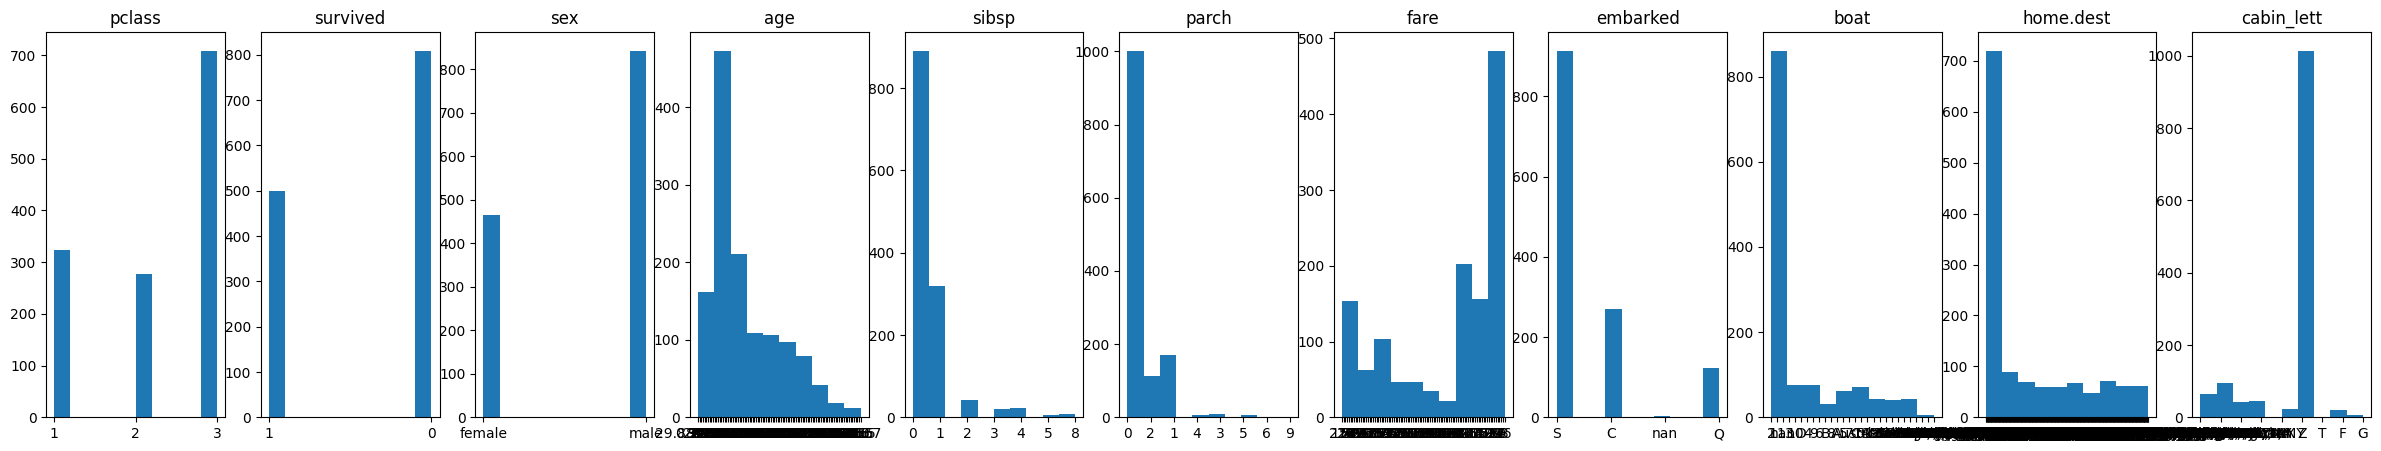

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(30, 5))
for i, col in enumerate(df.columns):
    ax[i].hist(df[col].astype(str))
    ax[i].set_title(col)
# plt.tight_layout()
plt.show()

In [11]:
#get_dummies

col_to_get_dum = ['sex', 'embarked', 'cabin_lett']

dummies = pd.get_dummies(df[col_to_get_dum], drop_first = True)
df = pd.concat([df, dummies], axis=1)

df.drop(col_to_get_dum, axis=1, inplace = True)

In [12]:
#label_encoders

col_to_lab_enc = ['boat']

le = LabelEncoder()

for i in range(len(col_to_lab_enc)):
    df[col_to_lab_enc[0]+'_labelencod'] = le.fit_transform(df[col_to_lab_enc].astype(str))
    df.drop(col_to_lab_enc, axis=1, inplace = True)
    
df.head()

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,pclass,survived,age,sibsp,parch,fare,home.dest,sex_male,embarked_Q,embarked_S,cabin_lett_B,cabin_lett_C,cabin_lett_D,cabin_lett_E,cabin_lett_F,cabin_lett_G,cabin_lett_T,cabin_lett_Z,boat_labelencod
0,1,1,29.0000,0,0,211,"St Louis, MO",False,False,True,True,False,False,False,False,False,False,False,11
1,1,1,0.9167,1,2,151,"Montreal, PQ / Chesterville, ON",True,False,True,False,True,False,False,False,False,False,False,2
2,1,0,2.0000,1,2,151,"Montreal, PQ / Chesterville, ON",False,False,True,False,True,False,False,False,False,False,False,27
3,1,0,30.0000,1,2,151,"Montreal, PQ / Chesterville, ON",True,False,True,False,True,False,False,False,False,False,False,27
4,1,0,25.0000,1,2,151,"Montreal, PQ / Chesterville, ON",False,False,True,False,True,False,False,False,False,False,False,27


In [13]:
#top feature_values encoding

col_to_top_feat = ['home.dest']

for i in range(len(col_to_top_feat)):
    for j in range(10): # top 10 feature_values
        df.loc[df[col_to_top_feat[i]] == df['home.dest'].value_counts().index[j], col_to_top_feat[i]+'_topfeatval'] = j+1
    df[col_to_top_feat[i]+'_topfeatval'].fillna(0, inplace=True)
    df.drop(col_to_top_feat, axis=1, inplace = True)
    
df.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,cabin_lett_B,cabin_lett_C,cabin_lett_D,cabin_lett_E,cabin_lett_F,cabin_lett_G,cabin_lett_T,cabin_lett_Z,boat_labelencod,home.dest_topfeatval
0,1,1,29.0000,0,0,211,False,False,True,True,False,False,False,False,False,False,False,11,0.0
1,1,1,0.9167,1,2,151,True,False,True,False,True,False,False,False,False,False,False,2,0.0
2,1,0,2.0000,1,2,151,False,False,True,False,True,False,False,False,False,False,False,27,0.0
3,1,0,30.0000,1,2,151,True,False,True,False,True,False,False,False,False,False,False,27,0.0
4,1,0,25.0000,1,2,151,False,False,True,False,True,False,False,False,False,False,False,27,0.0


In [14]:

# df.groupby('ticket')['survived'].count().sort_values(ascending=False)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pclass                1309 non-null   int64  
 1   survived              1309 non-null   int64  
 2   age                   1309 non-null   float64
 3   sibsp                 1309 non-null   int64  
 4   parch                 1309 non-null   int64  
 5   fare                  1309 non-null   int32  
 6   sex_male              1309 non-null   bool   
 7   embarked_Q            1309 non-null   bool   
 8   embarked_S            1309 non-null   bool   
 9   cabin_lett_B          1309 non-null   bool   
 10  cabin_lett_C          1309 non-null   bool   
 11  cabin_lett_D          1309 non-null   bool   
 12  cabin_lett_E          1309 non-null   bool   
 13  cabin_lett_F          1309 non-null   bool   
 14  cabin_lett_G          1309 non-null   bool   
 15  cabin_lett_T         

In [15]:
X = df.drop('survived', axis=1)
y_true = df.survived
X.head()


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,cabin_lett_B,cabin_lett_C,cabin_lett_D,cabin_lett_E,cabin_lett_F,cabin_lett_G,cabin_lett_T,cabin_lett_Z,boat_labelencod,home.dest_topfeatval
0,1,29.0000,0,0,211,False,False,True,True,False,False,False,False,False,False,False,11,0.0
1,1,0.9167,1,2,151,True,False,True,False,True,False,False,False,False,False,False,2,0.0
2,1,2.0000,1,2,151,False,False,True,False,True,False,False,False,False,False,False,27,0.0
3,1,30.0000,1,2,151,True,False,True,False,True,False,False,False,False,False,False,27,0.0
4,1,25.0000,1,2,151,False,False,True,False,True,False,False,False,False,False,False,27,0.0


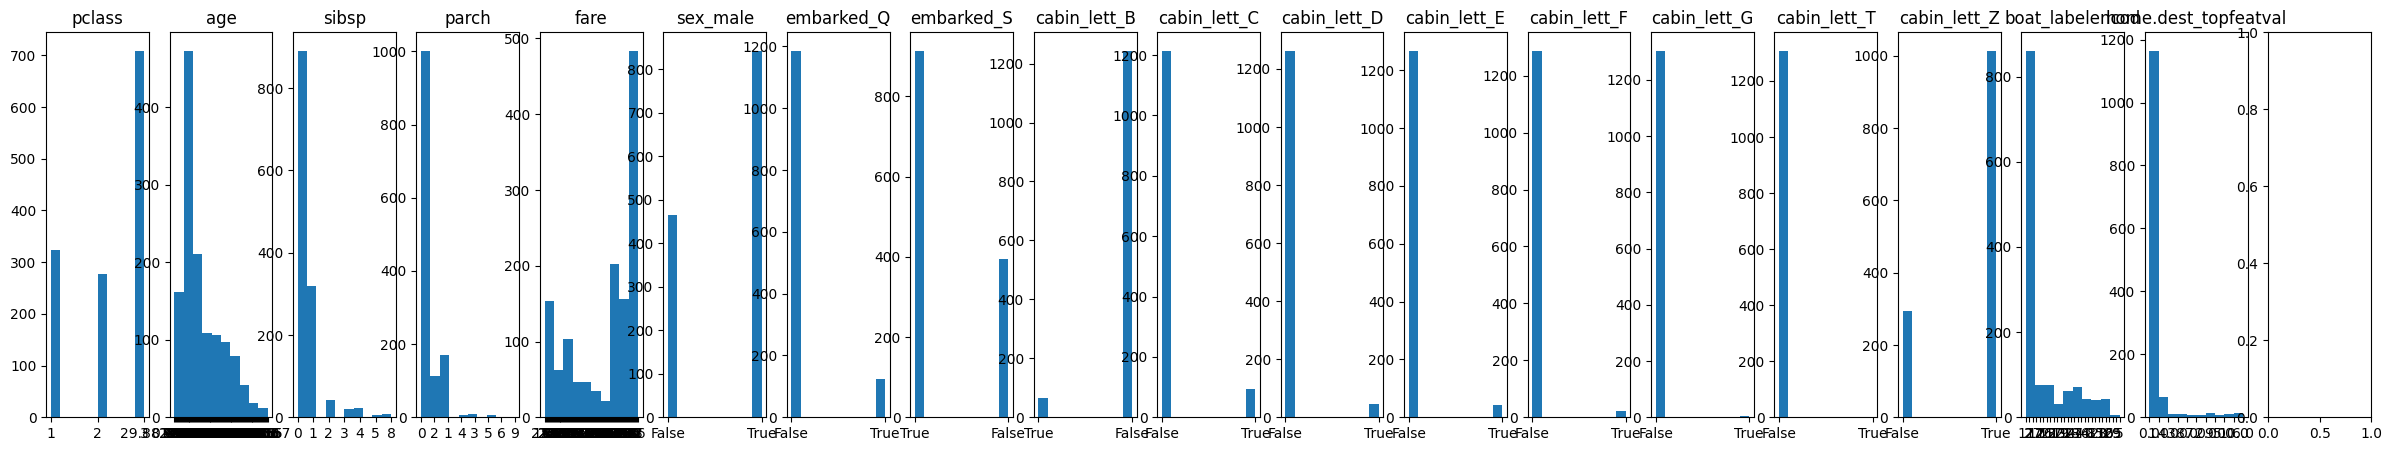

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(30, 5))
for i, col in enumerate(X.columns):
    ax[i].hist(X[col].astype(str))
    ax[i].set_title(col)
# plt.tight_layout()
plt.show()

In [17]:
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
X_norm = scaler.fit_transform(X)

In [18]:
clf = KMeans (n_clusters=2)
clf.fit(X)

y_pred = clf.predict(X)

correct_pred = y_true==y_pred

accuracy = np.sum(correct_pred)/len(correct_pred)
accuracy


C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6417112299465241

In [19]:
clf = KMeans (n_clusters=2)
clf.fit(X_norm)

y_pred = clf.predict(X_norm)

correct_pred = y_true==y_pred

accuracy = np.sum(correct_pred)/len(correct_pred)
accuracy

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7005347593582888

K-MEANS from scratch

In [20]:
class K_means_alf:
    
    
    
    def __init__(self, k=3, tol=0.001, max_iter=10):
        
        self.k=k 
        self.tol=tol
        self.max_iter=max_iter
        
    
    def fit(self, data):
        
        # initial cluster 
        init_clusters_sizes = [len(data)//self.k]*self.k
        remainder = len(data)%self.k    
        for i in range(remainder):
            init_clusters_sizes[i]+=1
        self.clusters = {}
        sorted_data = sorted(data, key=operator.itemgetter(*range(len(data[0])))) #(x[0], x[1],..., x[n])) 
        self.clusters[0] = [sorted_data[sum(init_clusters_sizes[:i]):sum(init_clusters_sizes[:i+1])] 
                       for i in range(len(init_clusters_sizes))]
        
        #following clusters
        self.centroids = {}
        self.distances = {}
        centroids_distance = {}
        centr_dist_diff = {}
        for iteration in range(self.max_iter):
            self.centroids[iteration] = [np.mean(self.clusters[iteration][cluster], axis=0) 
                                    for cluster in range(self.k)]
            if iteration > 0:
                centroids_distance[iteration] = [np.linalg.norm(self.centroids[iteration][cluster] - self.centroids[iteration-1][cluster]) 
                                                 for cluster in range(self.k)]
            if iteration > 1:
                centr_dist_diff[iteration] = [np.abs((centroids_distance[iteration][cluster] - centroids_distance[iteration - 1][cluster])/
                                        centroids_distance[iteration - 1][cluster])
                                              if (centroids_distance[iteration][cluster]!=0 and centroids_distance[iteration - 1][cluster]!=0) else 0
                                              for cluster in range(self.k)]
                if all(val < self.tol for val in centr_dist_diff[iteration]):
                    self.tot_iterations = iteration+1
                    break

            self.distances[iteration] = [[np.linalg.norm(data[i] - self.centroids[iteration][cluster]) 
                                     for i in range(len(data))] 
                                    for cluster in range(self.k)]
            
            self.min_dist= np.min(self.distances[iteration], axis=0)
            
            self.clusters[iteration+1] = [[data[i] 
                                      for i in range(len(data)) if (self.distances[iteration][cluster][i]==self.min_dist[i])] 
                                     for cluster in range(self.k)]
            
            self.tot_iterations = iteration+1
            
        print('\nCENTROIDS:',self.centroids, '\nCENTROIDS_DISTANCE:',centroids_distance, '\nCENDISTDIFF', centr_dist_diff)
        # return 'DISTANCES:',self.distances, 'MIN_DIST:', self.min_dist, 'CENTROIDS:',self.centroids, 'CENTROIDS_DISTANCE:',centroids_distance, 'CENDISTDIFF', centr_dist_diff
        

        
    def plot(self):
        
        colors = ['red', 'palegreen', 'lightskyblue',  'orange', 'purple', 'pink', 'brown', 'black', 'yellow', 'gray']
        for iteration in range(self.tot_iterations):
            _, ax = plt.subplots()
            for i, cluster in enumerate(self.clusters[iteration]):
                x_cluster = [col[0] for col in cluster]
                y_cluster = [col[1] for col in cluster]
                ax.scatter(x_cluster, y_cluster, c=colors[i], s = 10)
                x_centroid = self.centroids[iteration][i][0]
                y_centroid = self.centroids[iteration][i][1]
                ax.scatter(x_centroid, y_centroid, marker = '*', c='k', s = 100) 
                ax.annotate(np.round(self.centroids[iteration][i],3), xy = (x_centroid+0.2, y_centroid-0.2) )
        
        
        
    def predict(self):
        
        last_distances = self.distances[max(self.distances.keys())]
        return np.argmin(last_distances, axis=0)

            
        

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:



CENTROIDS: {0: [array([1.07142857, 4.2       ]), array([5.        , 6.57142857]), array([10. ,  6.5])], 1: [array([0.9 , 2.08]), array([4.22222222, 7.22222222]), array([10. ,  6.5])], 2: [array([0.9 , 2.08]), array([4.22222222, 7.22222222]), array([10. ,  6.5])]} 
CENTROIDS_DISTANCE: {1: [2.1269197810688687, 1.014135418727828, 0.0], 2: [0.0, 0.0, 0.0]} 
CENDISTDIFF {2: [0, 0, 0]}


array([0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1],
      dtype=int64)

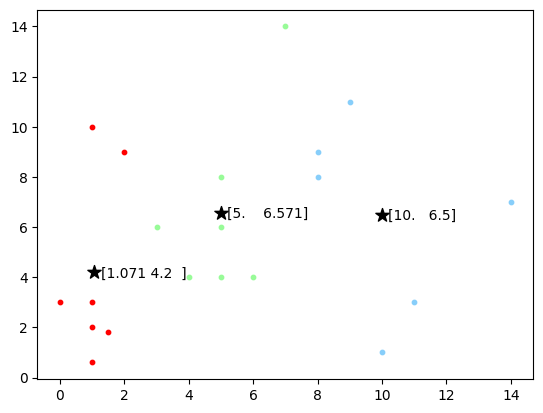

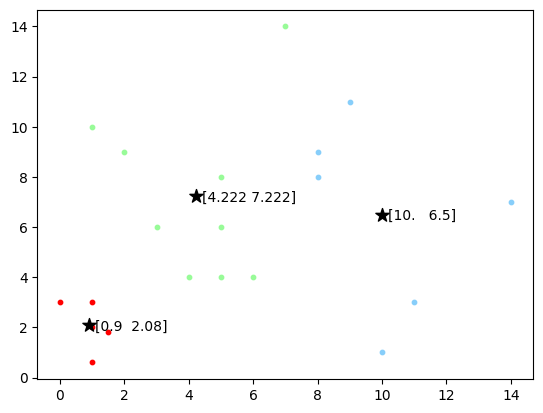

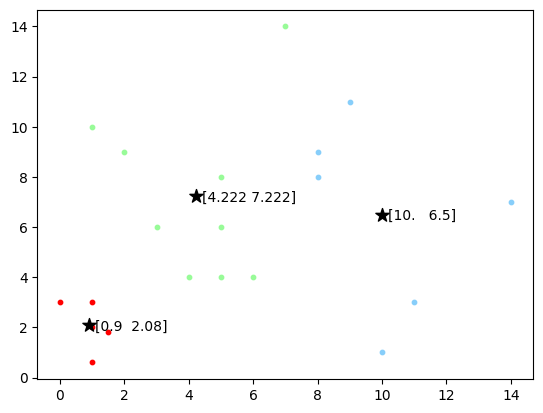

In [21]:
data=(np.array( [ [1, 2],
                  [3,6],
                  [8,9],
                  [5, 8 ],
                  [1.5, 1.8],
                  [8, 8],
                  [1, 0.6],
                  [9,11],
                  [1,3],
                  [0,3],
                  [5,4],
                  [6,4],
                  [5,6],
                  [10,1],
                  [11,3],
                  [7,14],
                  [14,7],
                  [4,4],
                  [1,10],
                  [2,9]]))


K_means_instance = K_means_alf(k=3, max_iter=10)
K_means_instance.fit(data)
K_means_instance.plot()
K_means_instance.predict()




CENTROIDS: {0: [array([2.68485701, 2.80891565]), array([6.01963458, 6.00574559]), array([9.32577456, 9.18811001])], 1: [array([2.86332943, 2.88878505]), array([6.03369848, 6.00375676]), array([9.15016975, 9.12114834])], 2: [array([2.89479469, 2.9162415 ]), array([6.02354101, 5.99411362]), array([9.11316531, 9.08673393])], 3: [array([2.89658042, 2.91773721]), array([6.01085255, 5.98122891]), array([9.10329355, 9.07720404])], 4: [array([2.89479469, 2.9162415 ]), array([5.99946909, 5.96961887]), array([9.09767421, 9.07148266])], 5: [array([2.89406667, 2.91532977]), array([5.99585978, 5.96556248]), array([9.0958092, 9.0701069])], 6: [array([2.89049238, 2.9123506 ]), array([5.99118052, 5.96013433]), array([9.0958092, 9.0701069])], 7: [array([2.88976159, 2.9114378 ]), array([5.98605362, 5.9550593 ]), array([9.09328629, 9.06774935])], 8: [array([2.88609042, 2.90855277]), array([5.98062443, 5.94785161]), array([9.09223677, 9.06717076])], 9: [array([2.88126709, 2.90349857]), array([5.9728123 ,

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

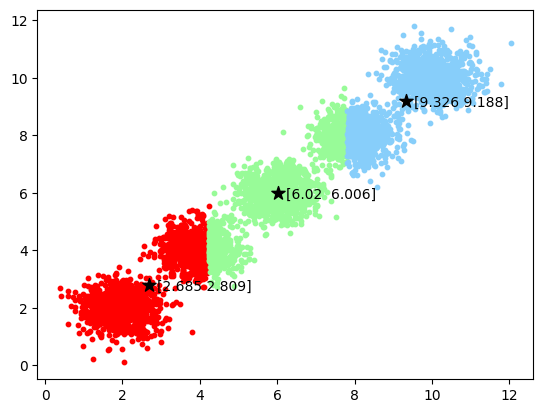

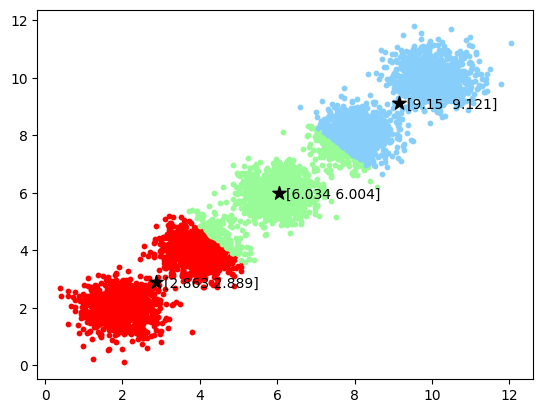

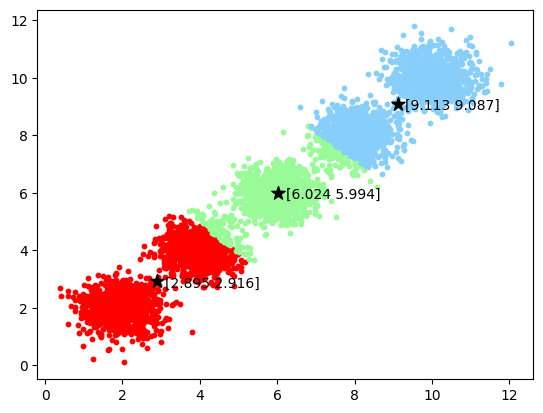

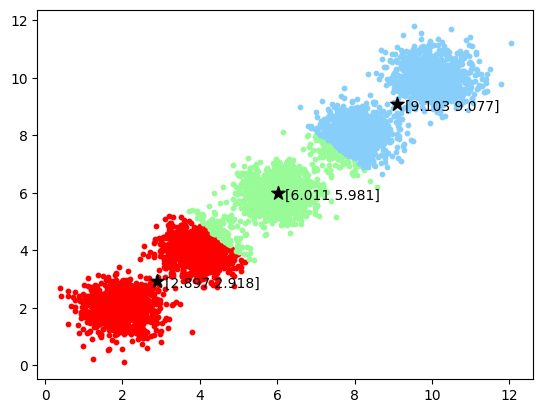

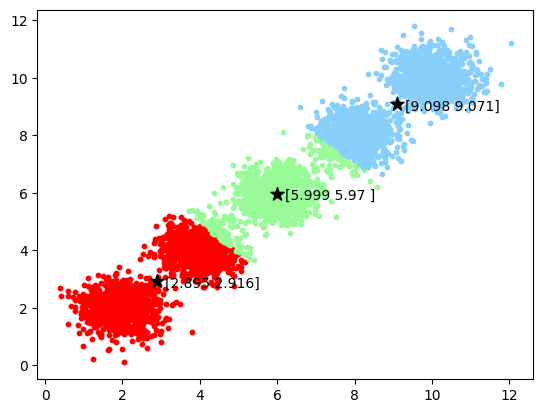

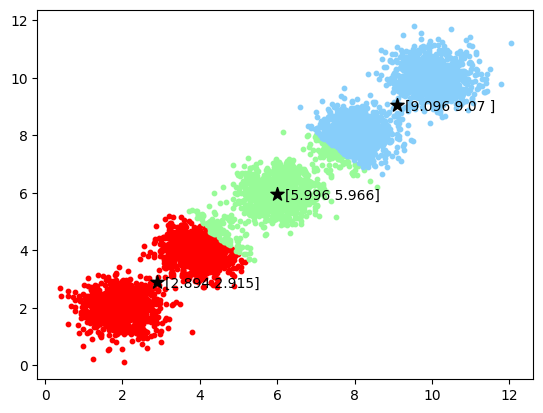

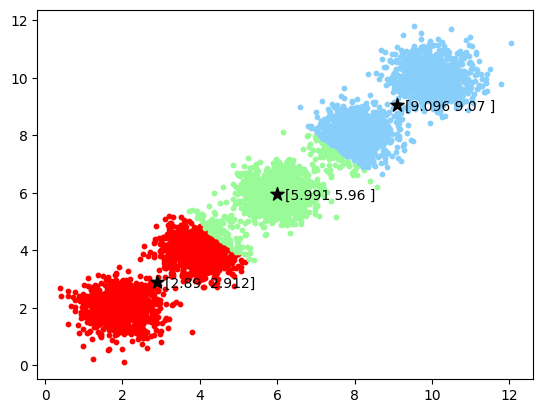

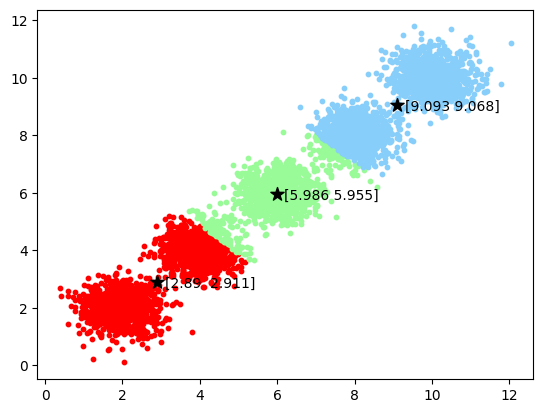

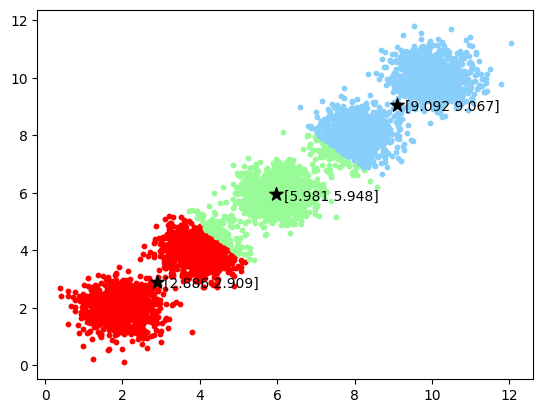

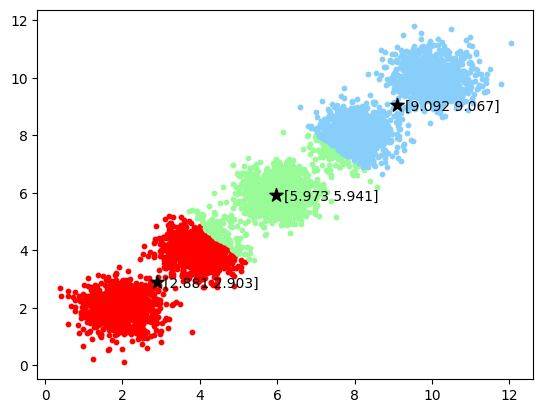

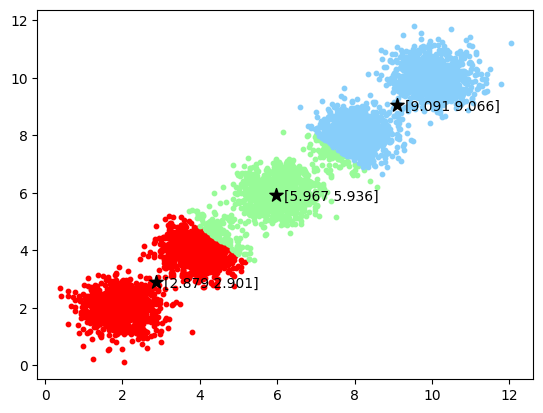

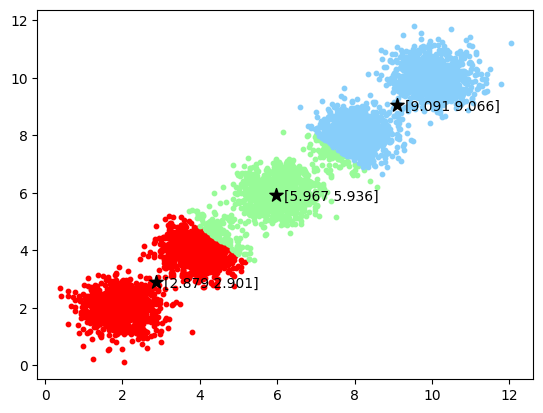

In [22]:

# generate a complex 2D dataset
np.random.seed(123)
num_samples = 1000
x1 = np.random.normal(loc=2, scale=0.5, size=num_samples)
y1 = np.random.normal(loc=2, scale=0.5, size=num_samples)
x2 = np.random.normal(loc=4, scale=0.5, size=num_samples)
y2 = np.random.normal(loc=4, scale=0.5, size=num_samples)
x3 = np.random.normal(loc=6, scale=0.5, size=num_samples)
y3 = np.random.normal(loc=6, scale=0.5, size=num_samples)
x4 = np.random.normal(loc=8, scale=0.5, size=num_samples)
y4 = np.random.normal(loc=8, scale=0.5, size=num_samples)
x5 = np.random.normal(loc=10, scale=0.5, size=num_samples)
y5 = np.random.normal(loc=10, scale=0.5, size=num_samples)
x = np.concatenate((x1, x2, x3, x4, x5))
y = np.concatenate((y1, y2, y3, y4, y5))
data = np.vstack((x, y)).T

K_means_instance = K_means_alf(k=3, max_iter=30)
K_means_instance.fit(data)
K_means_instance.plot()
K_means_instance.predict()


CENTROIDS: {0: [array([2.42512892, 3.69510905]), array([4.21193695, 4.35156986]), array([5.90498028, 5.67246307]), array([7.57419994, 6.34870305])], 1: [array([2.55221242, 3.2014303 ]), array([4.45076026, 4.04391037]), array([5.70404333, 5.93302283]), array([7.44075226, 6.90521978])], 2: [array([2.58679984, 3.14530947]), array([4.7614465 , 3.78703354]), array([5.45096332, 6.07699138]), array([7.38577202, 7.04823709])], 3: [array([2.59514265, 3.21001913]), array([5.1547109 , 3.54791805]), array([5.08748021, 6.22951049]), array([7.36717261, 7.00711916])], 4: [array([2.64908126, 3.21924548]), array([5.46199827, 3.50466938]), array([4.77333794, 6.31657209]), array([7.32844626, 6.96116569])], 5: [array([2.72310229, 3.19344391]), array([5.64918386, 3.56855194]), array([4.58336644, 6.32486832]), array([7.26808911, 6.94975963])], 6: [array([2.77977884, 3.16498956]), array([5.77313772, 3.62682289]), array([4.44444114, 6.28826132]), array([7.22033486, 6.96652549])], 7: [array([2.81616619, 3.126

C:\Users\Alienware\AppData\Local\Temp\ipykernel_1872\617017427.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


array([0, 0, 0, ..., 0, 0, 2], dtype=int64)

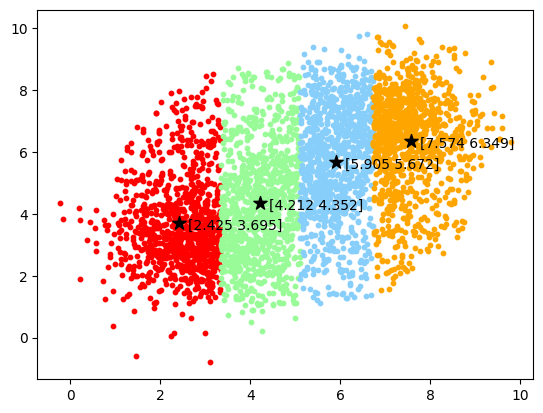

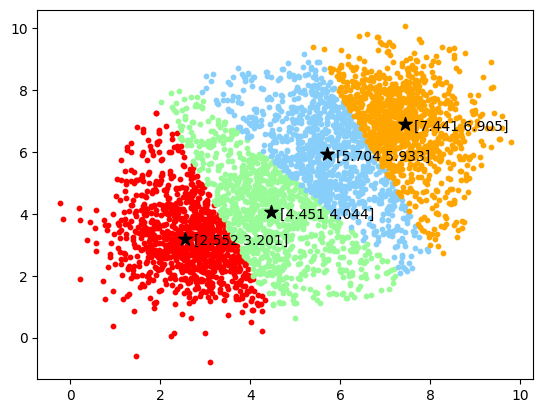

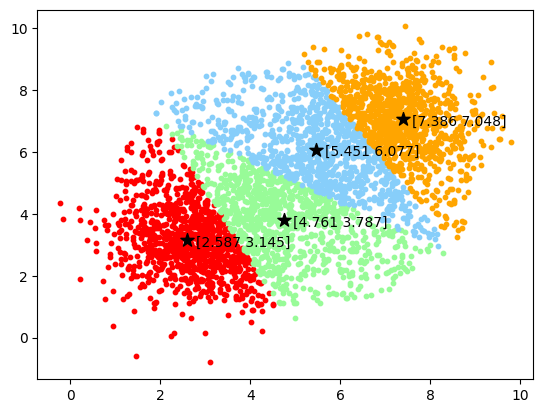

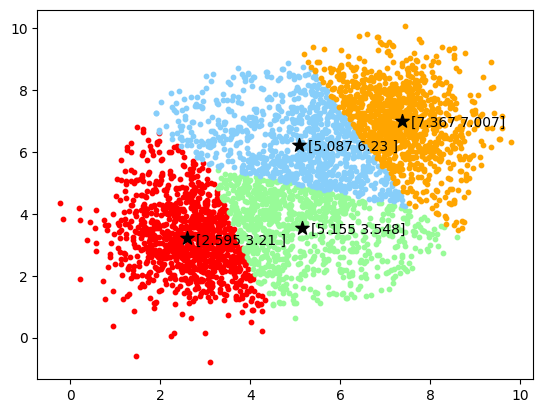

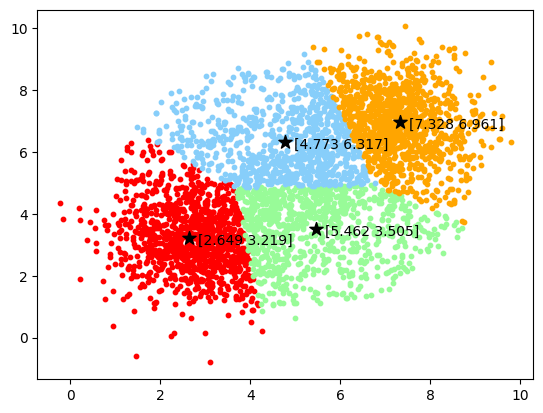

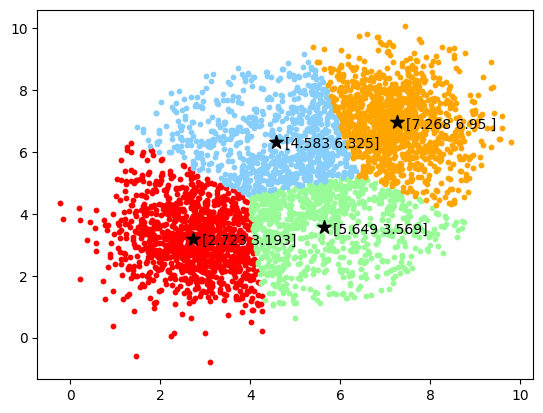

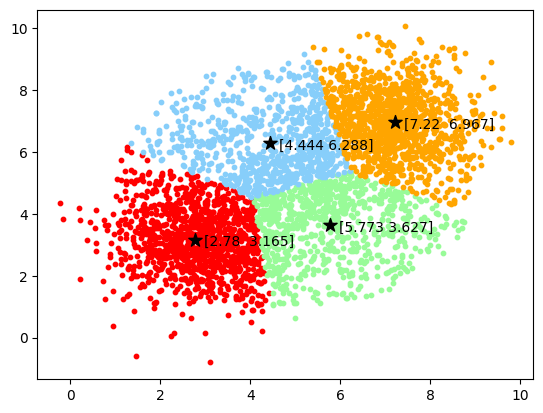

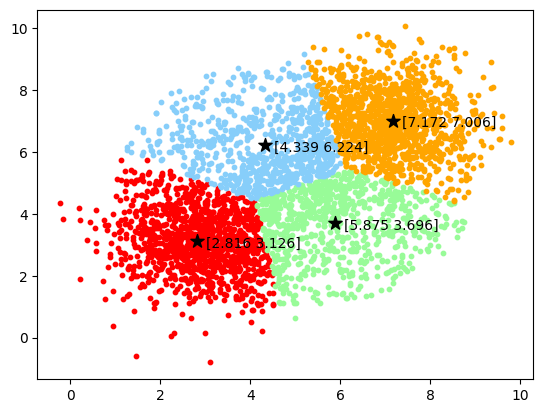

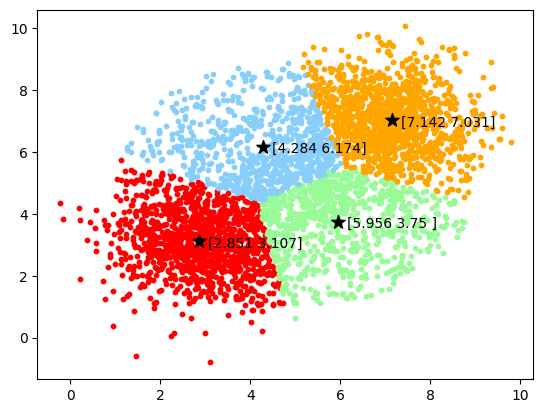

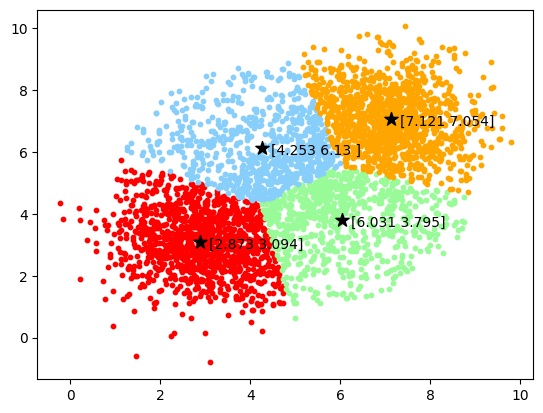

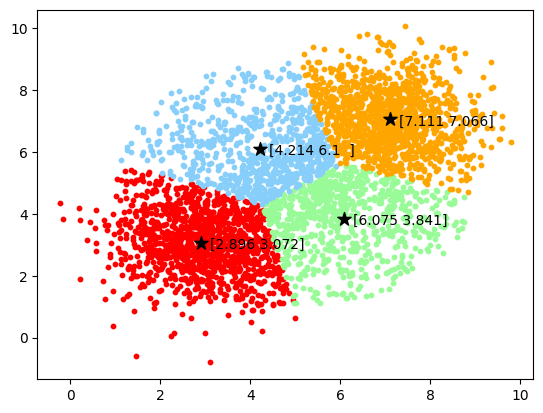

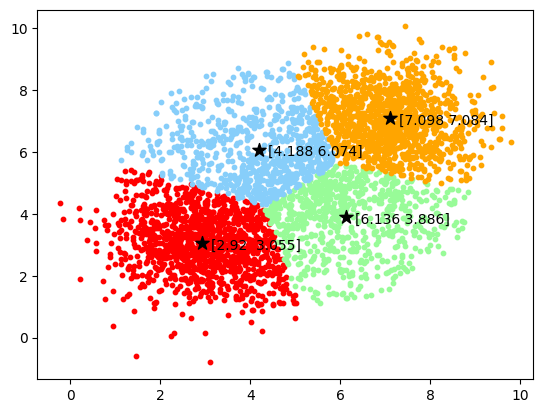

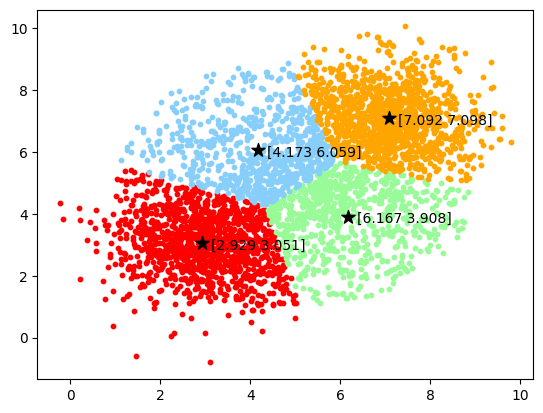

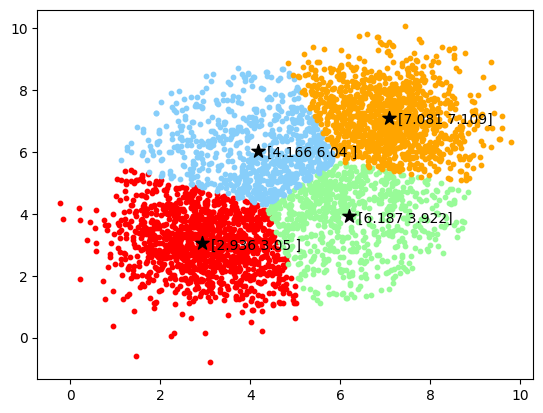

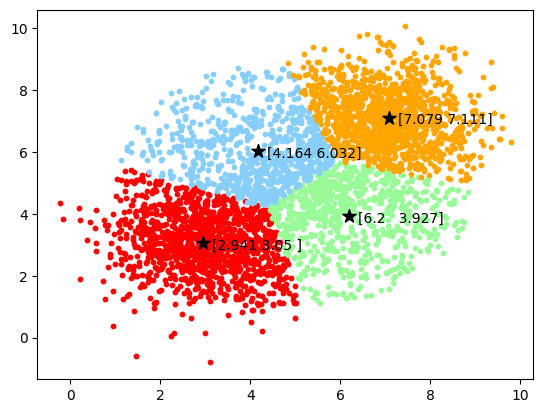

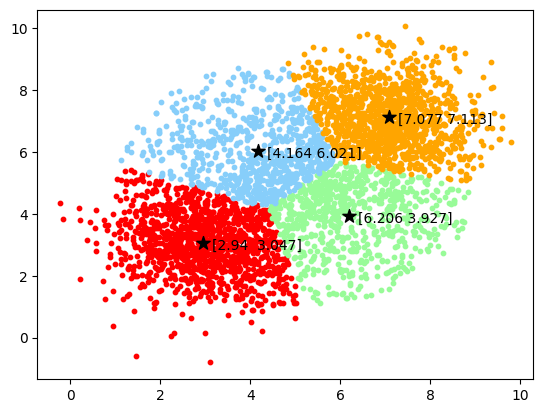

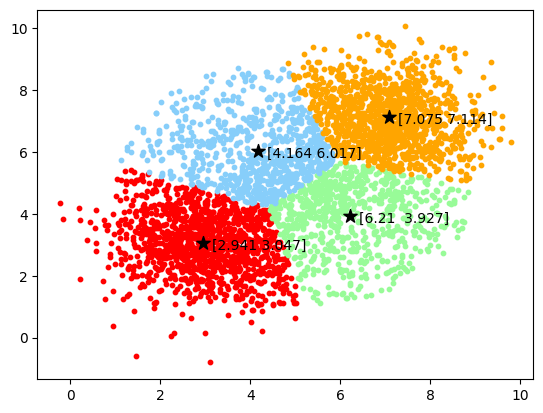

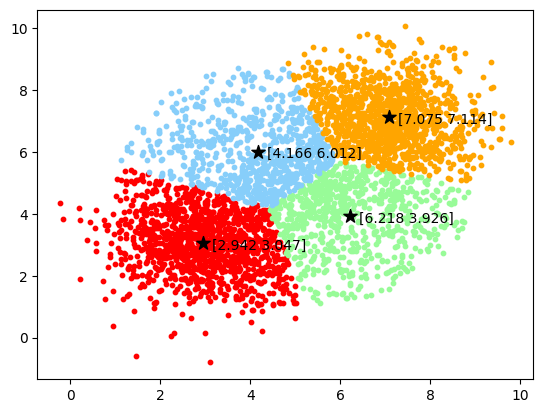

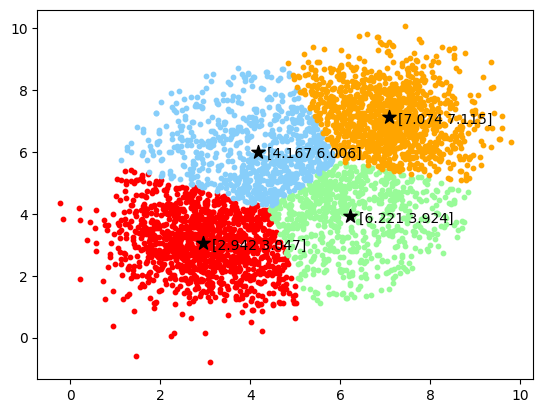

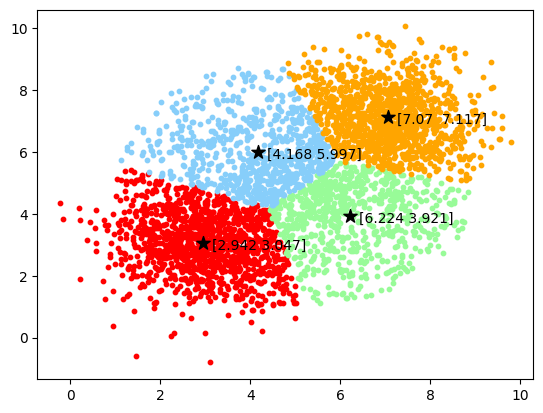

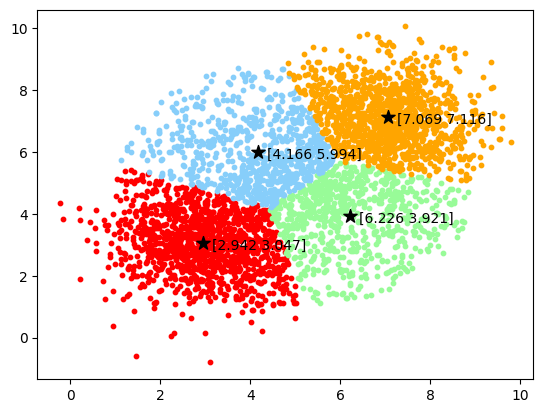

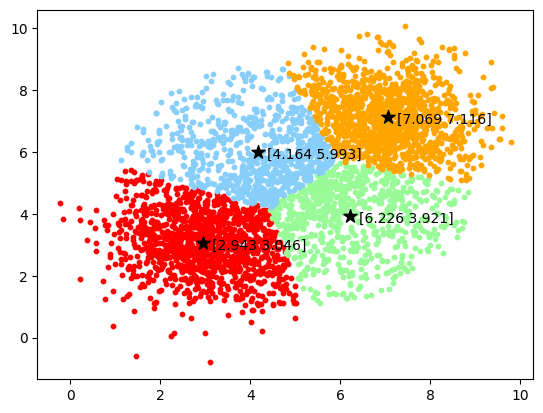

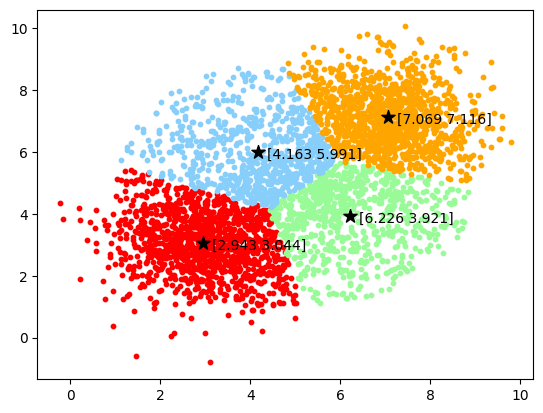

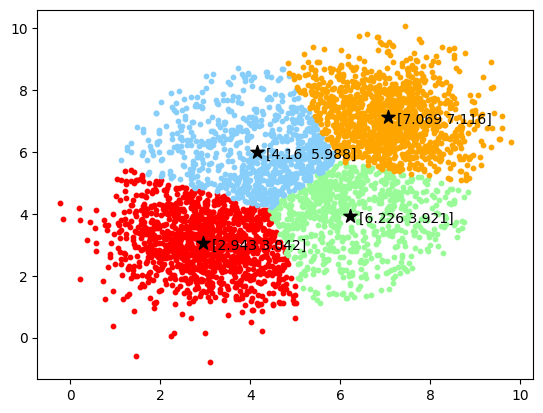

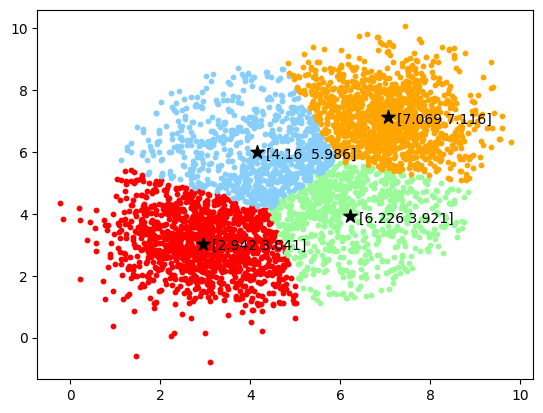

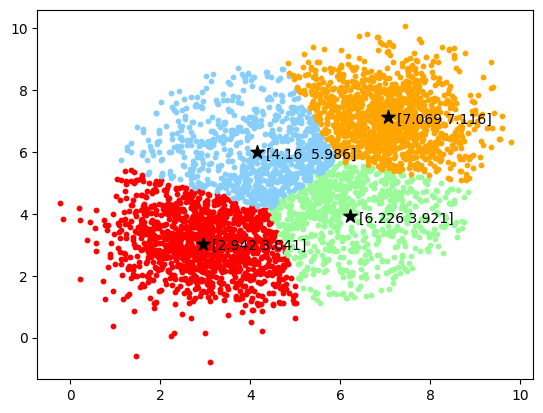

In [23]:
# generate a complex 2D dataset with irregular shapes
np.random.seed(123)
num_samples = 1000
x1 = np.random.normal(loc=3, scale=1, size=num_samples)
y1 = np.random.normal(loc=3, scale=1, size=num_samples)
x2 = np.random.normal(loc=7, scale=1, size=num_samples)
y2 = np.random.normal(loc=7, scale=1, size=num_samples)
x3 = np.random.normal(loc=5, scale=1, size=num_samples)
y3 = np.random.normal(loc=5, scale=1, size=num_samples)
angle = np.random.rand(num_samples) * 2 * np.pi
r = 2 + np.random.rand(num_samples) * 2
x4 = r * np.cos(angle) + 5
y4 = r * np.sin(angle) + 5
x = np.concatenate((x1, x2, x3, x4))
y = np.concatenate((y1, y2, y3, y4))
data = np.vstack((x, y)).T

K_means_instance = K_means_alf(k=4, max_iter=50)
K_means_instance.fit(data)
K_means_instance.plot()
K_means_instance.predict()

Try it on Titanic Dataset

In [24]:
K_means_instance = K_means_alf(k=2, max_iter=100)
K_means_instance.fit(X_norm)
# K_means_instance.plot()

y_pred = K_means_instance.predict()

correct_pred = y_true==y_pred

accuracy = np.sum(correct_pred)/len(correct_pred)
accuracy


CENTROIDS: {0: [array([0.29541985, 0.3936818 , 0.06870229, 0.04970314, 0.10469346,
       0.57709924, 0.02137405, 0.70229008, 0.09923664, 0.14351145,
       0.07022901, 0.05954198, 0.01984733, 0.00458015, 0.00152672,
       0.56793893, 0.71348601, 0.06259542]), array([1.        , 0.3506974 , 0.05600153, 0.03584777, 0.02354203,
       0.71100917, 0.16666667, 0.6941896 , 0.        , 0.        ,
       0.        , 0.0030581 , 0.01223242, 0.0030581 , 0.        ,
       0.98165138, 0.88492468, 0.01437309])], 1: [array([0.16451613, 0.42682045, 0.0561828 , 0.05065711, 0.1311744 ,
       0.44731183, 0.01075269, 0.64301075, 0.13978495, 0.20215054,
       0.09892473, 0.08817204, 0.0344086 , 0.01075269, 0.00215054,
       0.37634409, 0.61895659, 0.06129032]), array([0.91350711, 0.34211631, 0.06575829, 0.03844128, 0.0272211 ,
       0.75236967, 0.13981043, 0.72867299, 0.        , 0.        ,
       0.        , 0.        , 0.00592417, 0.        , 0.        ,
       0.99407583, 0.89841144, 0.025947

0.2987012987012987